# Home Work 2
## Optical flow
---
#### Helper Functions and Modules

In [12]:
import cv2 as cv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from numpy.linalg import pinv, inv

These helper functions are reused from my last programming homework.

The new addition to my functions is the optical flow function, which performs the optical flow algorithm.
This follows the description exactly. $I_x$ and $I_y$ are the results of applying the DoG filters, which grabs
the X and Y vectors respectively. $I_t$ is the temporal derivative or the difference of the image intensities between the
frames. The values are zero padded and then an operation similar to the convolution happens. We take a small square of
the Ix and Iy matrices $(3\times3)$ and from there create the $A$ value to try and solve:
$Ax = b$.

In order to create $A$, the $I_x$ and $I_y$ squares are vectorized and concatenated next to each other. We then check a
threshold ref(1), where we compare the smallest eigen value and if above the threshold
we do the next portion of the code. If above the threshold, a square of $I_t$ is taken and vectorized, which becomes my
$b$ value. From here we can solve for $x$ by doing:

$(A^T A)^{-1} A^T b = x$

or

$A^+ b = x$

Where, $(A^T A)^{-1} A^T = A^+$ is the psuedo inverse. This process get $x$ which contain my $V_x$ and $V_y$ values, and
those are saved to my $outPic$, which will contain the data for the images separately.

The Sobel function was reused to compute the final $V$ as:

$V = \sqrt((V_x)^2+(V_y)^2)$

[ref(1)](https://sandipanweb.wordpress.com/2018/02/25/implementing-lucas-kanade-optical-flow-algorithm-in-python/)

In [13]:
def myConv(imgOG, myfilter,padd=1):
    imgHeight,imgWidth = imgOG.shape
    #print(imgWidth)
    m,n =  myfilter.shape
    img = np.pad(imgOG, ((padd,padd), (padd,padd)), mode='constant').copy()
    #print(img)
    outPic = np.zeros((imgHeight,imgWidth))
    for i in range(imgHeight):
        for j in range(imgWidth):
            outPic[i,j] = (myfilter.flatten() @ img[i:m+i,j:n+j].flatten())
    return np.absolute(outPic)

def sobelFilt(Xgx,Xgy):
    return ((Xgx)**2 +(Xgy)**2)**(1/2)

def opticalFlow(Ix,Iy,It):
    padd=1
    imgHeight,imgWidth = It.shape
    m,n =  (3,3)
    IX = np.pad(Ix, ((padd,padd), (padd,padd)), mode='constant').copy()
    IY = np.pad(Iy, ((padd,padd), (padd,padd)), mode='constant').copy()
    IT = np.pad(It, ((padd,padd), (padd,padd)), mode='constant').copy()

    outPic = np.zeros((imgHeight,imgWidth,2))
    for i in tqdm(range(imgHeight),desc="Flowing... "):
        for j in range(imgWidth):
            IX_1 = IX[i:m+i,j:n+j].reshape(-1,1)
            IY_1 = IY[i:m+i,j:n+j].reshape(-1,1)
            A = np.hstack((IX_1,IY_1))
            if np.min(abs(np.linalg.eigvals(A.T @ A))) >= 50:
                b = IT[i:m+i,j:n+j].reshape(-1,1)
                # x = A^-1 b => v = Ixy^-1 It
                V = pinv(A) @ b
                outPic[i,j,0] = V[0]
                outPic[i,j,1] = V[1]
    #absoulte value?
    return np.absolute(outPic)

#### Filters

In [14]:
gBlur = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]])/16

gx = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]])

gy = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]])

#### Import Images

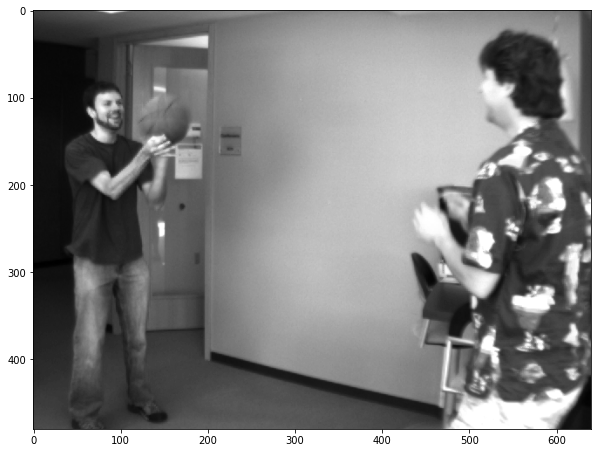

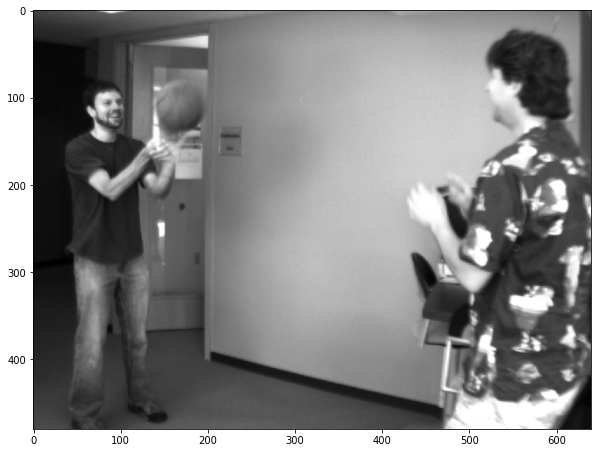

In [15]:
img1 = cv.imread('frame1_a.png',0)
plt.figure(figsize=(10,8))
plt.imshow(img1,cmap = "gray")
plt.show()
img2 = cv.imread('frame1_b.png',0)
plt.figure(figsize=(10,8))
plt.imshow(img2,cmap = "gray")
plt.show()

### Get Intensities

In this Section I am adding my gaussian blur to the images and getting my $I_x$ and $I_y$ values.
From there I am also calculating $I_t$ by using the sobel filter on both frames
and subtracting one from the other.

In [16]:
img1 = myConv(img1,gBlur)
img2 = myConv(img2,gBlur)

Ix = myConv(img1,gx)
Iy = myConv(img1,gy)

It1 = sobelFilt(Ix,Iy)
It2 = sobelFilt(myConv(img2,gx),myConv(img2,gy))
It = It2-It1

### Display image intensities

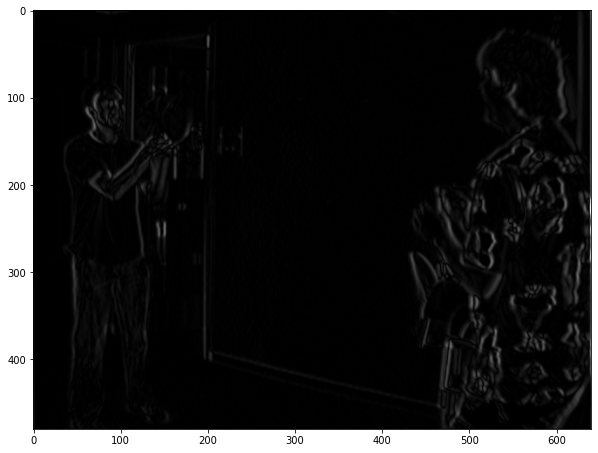

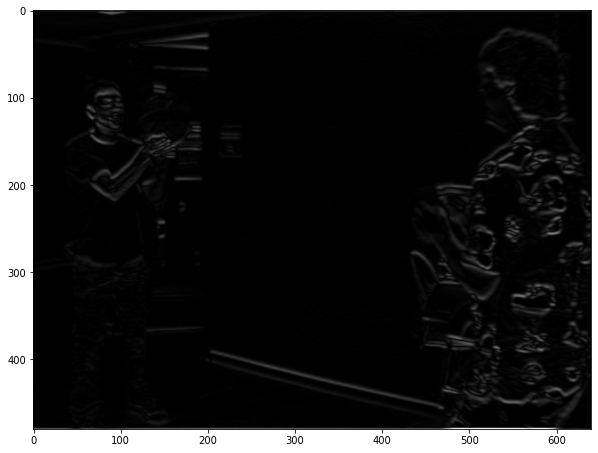

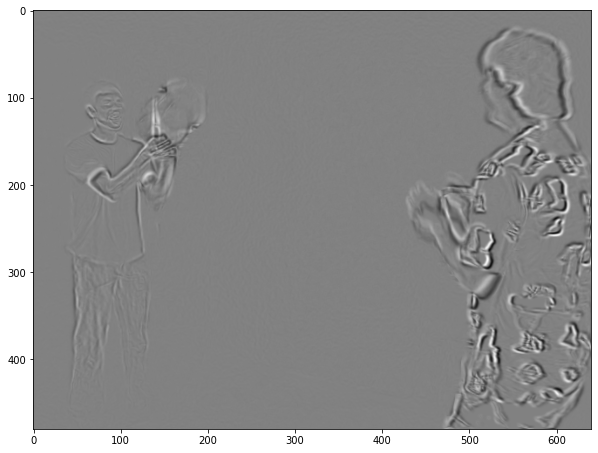

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(Ix,cmap = "gray")
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(Iy,cmap = "gray")
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(It,cmap = "gray")
plt.show()

### OLS
From here my Optical Flow function is used and the images were displayed. I was having
trouble getting the images to really $\it{"pop"}$, so I looked through different color map
types and normalized using the $vmin$ and $vmax$ parameters. $\pm8$ seemed to work the best. Normalizing the old fashioned way didn't work as well as this. Between that and changing the $opticalFlow$ threshold value, the image vectors began to show up.

Flowing... : 100%|██████████| 480/480 [00:13<00:00, 36.18it/s]


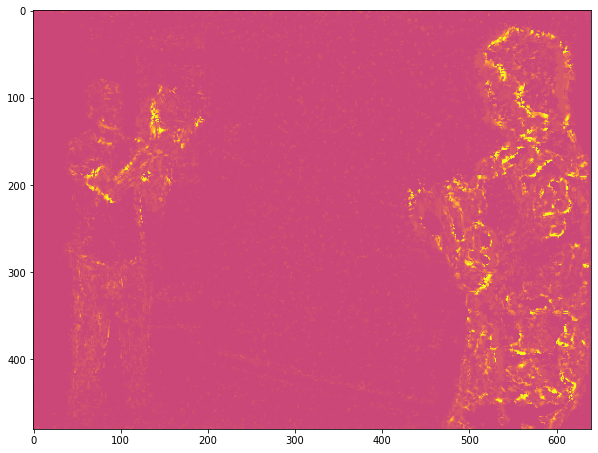

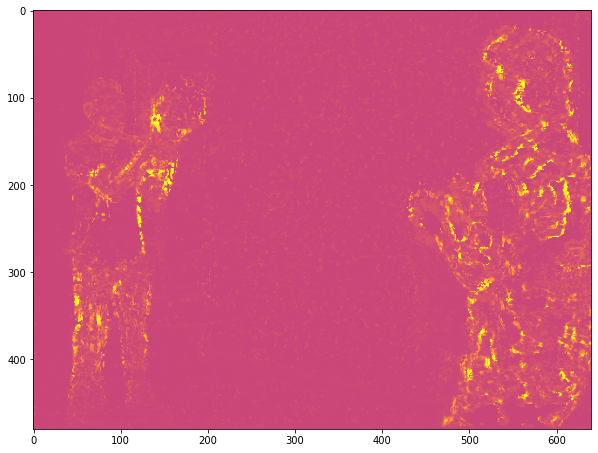

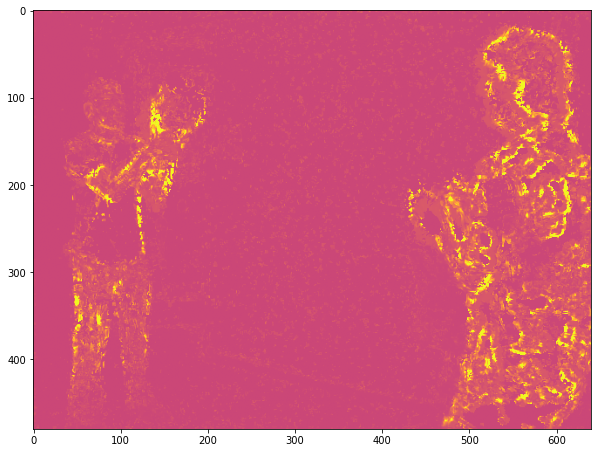

In [18]:
V = opticalFlow(Ix,Iy,It)
Vx = V[:,:,0]
Vy = V[:,:,1]

plt.figure(figsize=(10,8))
plt.imshow(Vx,cmap = 'plasma',vmin=-8, vmax=8)
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(Vy,cmap = 'plasma',vmin=-8, vmax=8)
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(sobelFilt(Vx,Vy),cmap = 'plasma',vmin=-8, vmax=8)
plt.savefig('V.png')
plt.show()

# Image set 2
The operations for this portion of the code is exactly the same as the one before.

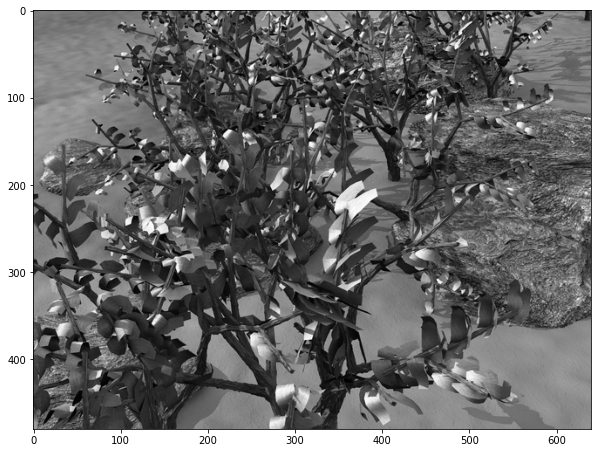

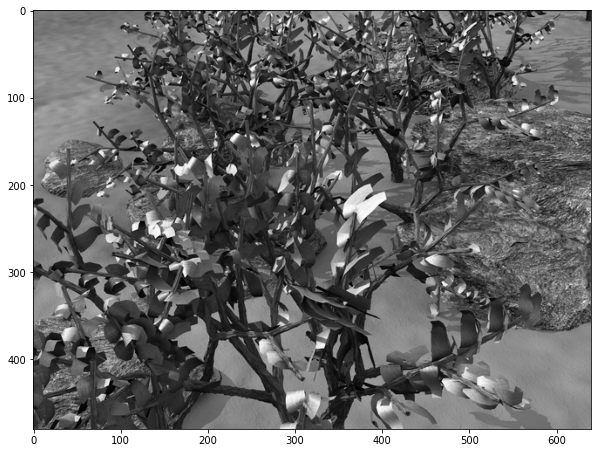

In [19]:
img1 = cv.imread('frame2_a.png',0)
plt.figure(figsize=(10,8))
plt.imshow(img1,cmap = "gray")
plt.show()
img2 = cv.imread('frame2_b.png',0)
plt.figure(figsize=(10,8))
plt.imshow(img2,cmap = "gray")
plt.show()

#### Get Intensities

In [20]:
img1 = myConv(img1,gBlur)
img2 = myConv(img2,gBlur)

Ix = myConv(img1,gx)
Iy = myConv(img1,gy)

It1 = sobelFilt(Ix,Iy)
It2 = sobelFilt(myConv(img2,gx),myConv(img2,gy))
It = It2-It1

### Display image intensities

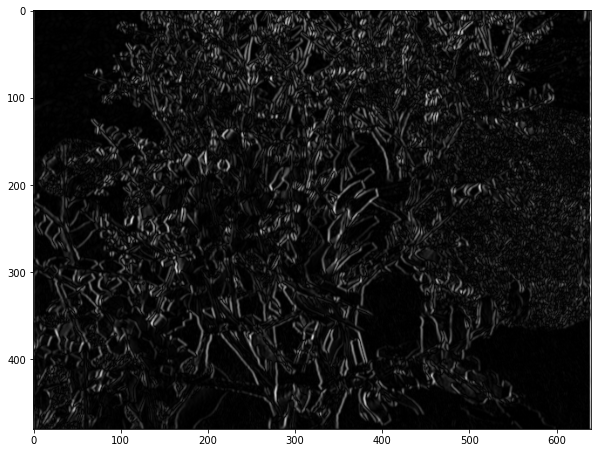

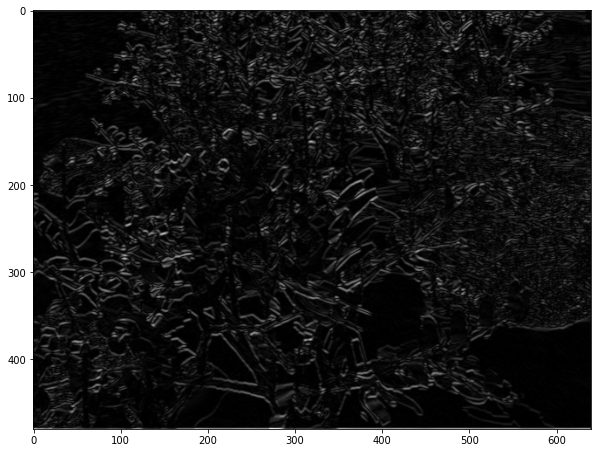

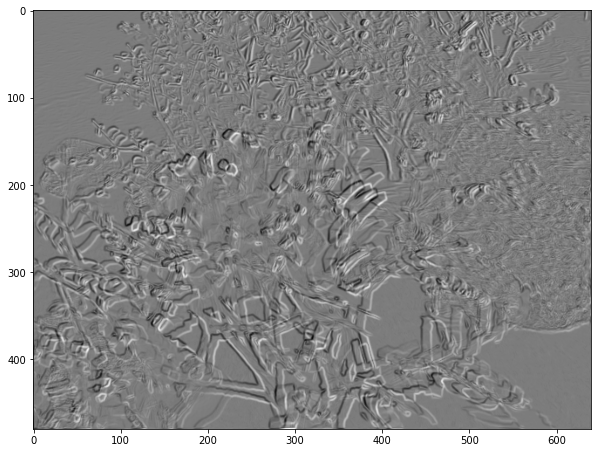

In [21]:
plt.figure(figsize=(10,8))
plt.imshow(Ix,cmap = "gray")
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(Iy,cmap = "gray")
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(It,cmap = "gray")
plt.show()

### OLS

Flowing... : 100%|██████████| 480/480 [00:19<00:00, 24.46it/s]


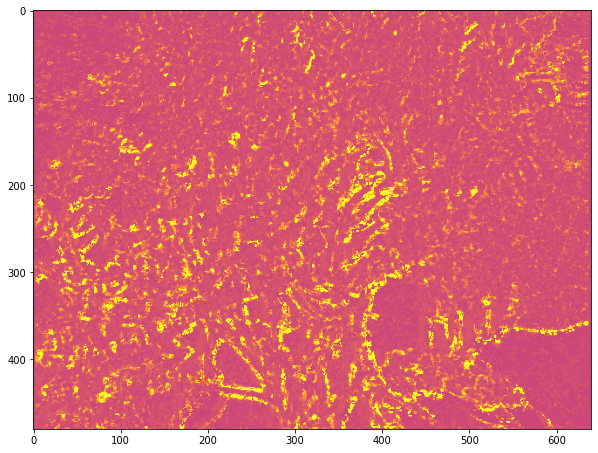

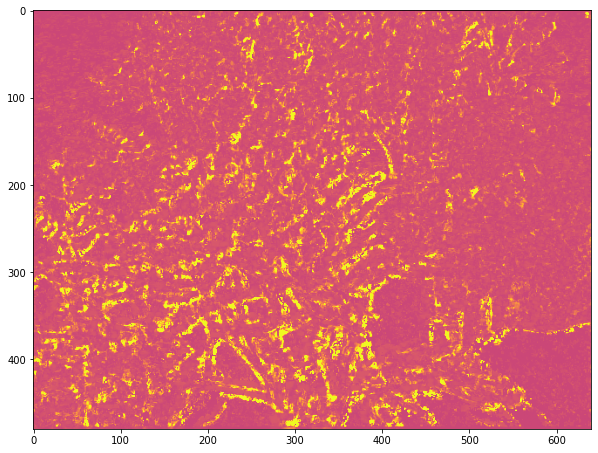

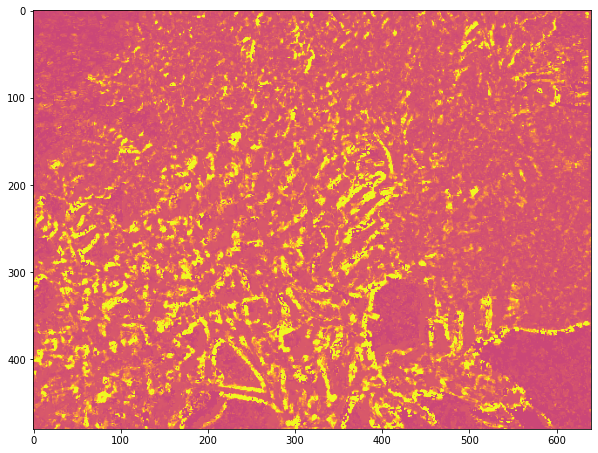

In [22]:
V = opticalFlow(Ix,Iy,It)
Vx = V[:,:,0]
Vy = V[:,:,1]

plt.figure(figsize=(10,8))
plt.imshow(Vx,cmap = 'plasma',vmin=-8, vmax=8)
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(Vy,cmap = 'plasma',vmin=-8, vmax=8)
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(sobelFilt(Vx,Vy),cmap = 'plasma',vmin=-8, vmax=8)
plt.savefig('V.png')
plt.show()
